# Cluster Analysis

Cluster analysis is a technique used to identify natural groupings or clusters within a dataset.

❓ Question: Is cluster analysis a type of exploratory, diagnositic, predictive or prescriptive data analysis?

The most simple type of cluster analysis algorith is **k-means clustering**. As an unsupervised learning method, it is used when we're working with unlabelled data--data without defined categories or groups.

The algorithm alternates between two steps:

1. Assigning each data point to the closest cluster center.

2. Setting each cluster center as the mean of the data points that are assigned to it. The algorithm is finished when the assignment of instances to clusters no longer changes.





## Set Up and Preprocessing

For this notebook, we'll be using the [Wisconsin Breast Cancer Dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). Our goal is to use cluster analysis to differentiate between malignant and benign tumors using k-means clustering.

Let's begin by importing the necessary libraries and getting a look at our dataset.

In [ ]:
# Import Necessary Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
# Upload dataset
df = pd.read_csv('data.csv')

# See first five rows + meta data
display(df.head())
df.info()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Understanding the Dataset

An unbalanced dataset can significantly impact the results of clustering analysis, as the algorithm may tend to favor the majority class and poorly represent the minority class.

✅ Try it yourself: Create a bar plot of the value counts from the 'diagnosis' column.

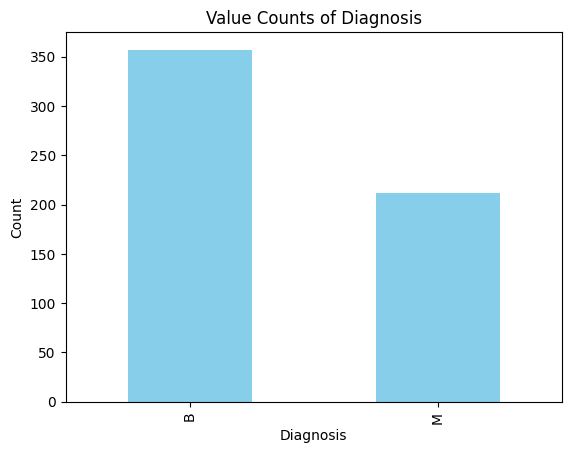

In [ ]:
# Your Code Here
counts = df['diagnosis'].value_counts()

counts.plot(kind='bar', color = 'skyblue')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Value Counts of Diagnosis')
plt.show()

The following table provides generally accepted names and ranges for different degrees of imbalance in a dataset:

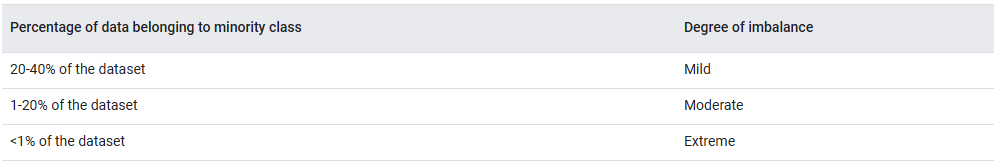

❓ Question: Is the degree of imbalance in this dataset considered mild, moderate, or extreme?

### Seperate Features and Target

Let's separate the dataset into features (X) and the target variable (y). The target variable, 'diagnosis', contains the categorical data indicating whether a tumor is malignant or benign. The features include the continuous variables such as radius1, texture1, and so on, which will be used for clustering.

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:

X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)  # Features shouldn't include target, drop NaN values in unnamed column
y = df['diagnosis']  # Target

# Check the initial shape of the dataset
print(f"Initial shape of X: {X.shape}")

print(X.isnull().sum())

Initial shape of X: (569, 30)
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### Scaling the Data

K-Means clustering is highly sensitive to the scale of the data. Let's scale the continuous features using StandardScaler.

✅ Try it yourself: Scale the features from X using StandardScaler and store in a variable called X_scaled.

In [ ]:
# Your Code Here

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the scaled shape of the dataset
print(f"Scaled shape of X: {X_scaled.shape}")


Scaled shape of X: (569, 30)


## K-Means Clustering

K-Means works by minimizing the sum of squared distances (inertia) between the data points and the centroids of their respective clusters.

Here's how K-Means works in general:

1. Choose the Number of Clusters (k): The user specifies the number of clusters to divide the dataset into.
2. Random Initialization: k cluster centroids are randomly initialized.
3. Assignment Step: Each data point is assigned to the nearest centroid based on Euclidean distance (or another metric).
4. Update Step: The centroids are updated by calculating the mean position of all points within a cluster.
5. Repeat: Steps 3 and 4 repeat until the centroids stabilize or the algorithm reaches a maximum number of iterations.

With the `KMeans` function from `sklearn.cluster`, we can chose how many classes or groups we want to split the data into. In the context of this dataset, we have two obvious classes: Malignant (1) and Benign (0). The algorithm will attempt to group the data points such that each cluster contains points that are as similar to each other as possible. It does this only using the features and does not use the target labels, since it is an unsupervised method. The success of setting our number of clusters, k, equal to 2 depends on whether the numerical features in the dataset naturally seperate malignant and benign tumors into distinct groups. If the features are highly distinct for malignant and benign cases, k=2 can effectively seperate them. However, if the features overlap significantly, the clusters may be mixed.



In [ ]:
print(y.unique())

['M' 'B']


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score

# Perform k-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)  # Use the scaled features

# Get cluster labels
cluster_labels = kmeans.labels_

# Map cluster labels to actual diagnosis (manual mapping required since labels can differ)
# Let's assume cluster 0 corresponds to 'M' (malignant) and cluster 1 to 'B' (benign)
# We should replace this as necessary based on observed results
predicted_labels = ['M' if label == 0 else 'B' for label in cluster_labels]

# Evaluate clustering against the actual Diagnosis column
conf_matrix = confusion_matrix(y, predicted_labels, labels=['M', 'B'])
accuracy = accuracy_score(y, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[175  37]
 [ 13 344]]
Accuracy: 0.91


## PCA for Visualization

Principal component analysis (PCA) is an unsupervised machine learning technique we can use by calling it from `sklearn.decomposition`. Perhaps the most popular use of principal component analysis is dimensionality reduction. Besides using PCA as a data preparation technique, we can also use it to help visualize data. With the data visualized, it's easier for us to get some insights into our clustering algorithm.

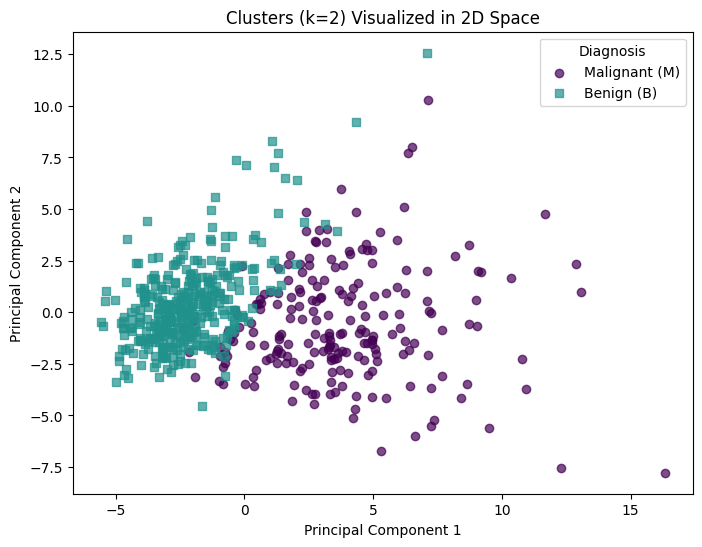

In [ ]:
from sklearn.decomposition import PCA

# Create PCA transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create the plot
plt.figure(figsize=(8, 6))

# Create the scatter plot for each class separately
plt.scatter(X_pca[df['diagnosis'] == 'M', 0],
           X_pca[df['diagnosis'] == 'M', 1],
           c='#440154',  # Purple for Malignant
           marker='o',
           label='Malignant (M)',
           alpha=0.7)

plt.scatter(X_pca[df['diagnosis'] == 'B', 0],
           X_pca[df['diagnosis'] == 'B', 1],
           c='#21918c',  # Teal for Benign
           marker='s',
           label='Benign (B)',
           alpha=0.7)

plt.title('Clusters (k=2) Visualized in 2D Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add a legend
plt.legend(title='Diagnosis', loc='best')

plt.show()

❓ Question: Based on this visualization, do you see any sort of natural divide in the features?

## Model Evaluation

We can see that our accuracy above was fairly high, meaning that the features of our dataset are distinct for malignant versus benign tumors and k=2 works, to some degree. However, often when using a clustering algorithm, we'll use a metric like a **silhouette score** to evaluate how well a clustering algorithm groups data points into clusters. The silhouette score is calculated for each data point by finding the mean distance between the point and all other data points in the same cluster, and the mean distance between the point and all other data points in the nearest neighboring cluster. The silhouette score is then calculated as the difference between these two distances, normalized by the maximum value. The silhouette score ranges from -1 to 1, with higher values indicating that the object is well-matched to its own cluster and poorly-matched to other clusters. A silhouette score above 0.5 indicates good clustering, while a score below 0.25 indicates poor clustering.



In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for k = 2
sil_score = silhouette_score(X_scaled, cluster_labels)

print(f"Silhouette Score for k=2: {sil_score:.2f}")

Silhouette Score for k=2: 0.34


❓ Question: What does this silhouette score tell us about our clustering?

🤺 Challenge: Select fewer features and try K-Means Clustering for yourself. Did the more limited feature selection allow for more or less effective clustering?

In [ ]:
# Your Code Here

## Conclusion

By applying k-means clustering, we were able to group the tumors into distinct categories, potentially identifying malignant and benign cases based on feature similarities. PCA further enhanced our analysis by reducing the complexity of the data, allowing us to visualize the clustering results in a 2D space. This combination not only provides insights into the underlying structure of the data but also facilitates better decision-making for diagnostic purposes. While the clustering results and visualizations are promising, further refinement with additional techniques, such as supervised learning, could improve classification accuracy and clinical relevance.

### 📑 Sources and Further Reading:

1. [Introduction to k-Means Clustering with scikit-learn in Python](https://www.datacamp.com/tutorial/k-means-clustering-python?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720830&utm_adgroupid=157156377071&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=724847715016&utm_targetid=dsa-2218886984380&utm_loc_interest_ms=&utm_loc_physical_ms=9029757&utm_content=&utm_campaign=230119_1-sea~dsa~tofu_2-b2c_3-us_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na-dec24&gad_source=1&gclid=CjwKCAiAmrS7BhBJEiwAei59i2xyAuPzkyozOsLAqWhslF7P_Fr0L67P-pl5j1JY2xRBZNu8YRKPjBoC-_cQAvD_BwE) | DataCamp
2. [Clustering with k-Means](https://www.kaggle.com/code/ryanholbrook/clustering-with-k-means) | Medium | Ryan Holbrook
3. [Cluster analysis of Breast Cancer Dataset](https://www.kaggle.com/code/vishwaparekh/cluster-analysis-of-breast-cancer-dataset/notebook) | Vishwa Pareka | Kaggle